In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys, os, glob
import datetime

In [148]:
folder_path = '1_4_solution'

try:	#else already exists
    plot_path = folder_path + "_plot"
    os.makedirs(plot_path)
except:
    pass


In [149]:
mav_state_df = pd.read_csv(folder_path + "/_slash_br4_slash_mavros_slash_state.csv")
mav_state_df = mav_state_df[["rosbagTimestamp", "mode", "armed", "guided"]]
mav_state_df["rosbagTimestamp"] = mav_state_df["rosbagTimestamp"].apply(
    lambda x: datetime.datetime.utcfromtimestamp(x // 1000000000) + datetime.timedelta(microseconds=x % 1000000000/1000))

In [150]:
mav_state_extract_df = mav_state_df[mav_state_df["armed"] == True]
timestamps = mav_state_extract_df['rosbagTimestamp']

start_time = timestamps.iloc[0]
end_time = timestamps.iloc[-1]

In [151]:
ang_deg_df = pd.read_csv(folder_path + "/_slash_br4_slash_angle_degree.csv")
ang_deg_df = ang_deg_df[["rosbagTimestamp", "x.1", "y.1", "z.1"]]
ang_deg_df.columns = ["rosbagTimestamp", "x", "y", "z"]
ang_deg_df["rosbagTimestamp"] = ang_deg_df["rosbagTimestamp"].apply(
    lambda x: datetime.datetime.utcfromtimestamp(x // 1000000000) + datetime.timedelta(microseconds=x % 1000000000/1000))

In [152]:
ang_deg_extract_df = ang_deg_df[ ang_deg_df["rosbagTimestamp"] >= start_time][ang_deg_df["rosbagTimestamp"] <= end_time]

/tmp/ipykernel_94829/3333728315.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ang_deg_extract_df = ang_deg_df[ ang_deg_df["rosbagTimestamp"] >= start_time][ang_deg_df["rosbagTimestamp"] <= end_time]


In [153]:
ang_vel_df = pd.read_csv(folder_path + "/_slash_br4_slash_angular_velocity.csv")
ang_vel_df = ang_vel_df[["rosbagTimestamp", "x.1", "y.1", "z.1"]]
ang_vel_df.columns = ["rosbagTimestamp", "x", "y", "z"]
ang_vel_df["rosbagTimestamp"] = ang_vel_df["rosbagTimestamp"].apply(
    lambda x: datetime.datetime.utcfromtimestamp(x // 1000000000) + datetime.timedelta(microseconds=x % 1000000000/1000))

In [154]:
ang_vel_extract_df = ang_vel_df[ ang_vel_df["rosbagTimestamp"] >= start_time][ang_vel_df["rosbagTimestamp"] <= end_time]

/tmp/ipykernel_94829/2056222358.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ang_vel_extract_df = ang_vel_df[ ang_vel_df["rosbagTimestamp"] >= start_time][ang_vel_df["rosbagTimestamp"] <= end_time]


In [155]:
thrust_df = pd.read_csv(folder_path + "/_slash_br4_slash_mavros_slash_rc_slash_override.csv")
# thrust_df = thrust_df[["rosbagTimestamp", "x.1", "y.1", "z.1"]]
# thrust_df.columns = ["rosbagTimestamp", "x", "y", "z"]
thrust_df["heave"] = thrust_df['channels'].apply(lambda x: int(x.strip("[]").split(",")[2]))
thrust_df["yaw"] = thrust_df['channels'].apply(lambda x: int(x.strip("[]").split(",")[3]))
thrust_df.drop("channels", axis = 1, inplace = True)
thrust_df["rosbagTimestamp"] = thrust_df["rosbagTimestamp"].apply(
    lambda x: datetime.datetime.utcfromtimestamp(x // 1000000000) + datetime.timedelta(microseconds=x % 1000000000/1000))

In [156]:
thrust_extract_df = thrust_df[ thrust_df["rosbagTimestamp"] >= start_time][thrust_df["rosbagTimestamp"] <= end_time]

/tmp/ipykernel_94829/333526217.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  thrust_extract_df = thrust_df[ thrust_df["rosbagTimestamp"] >= start_time][thrust_df["rosbagTimestamp"] <= end_time]


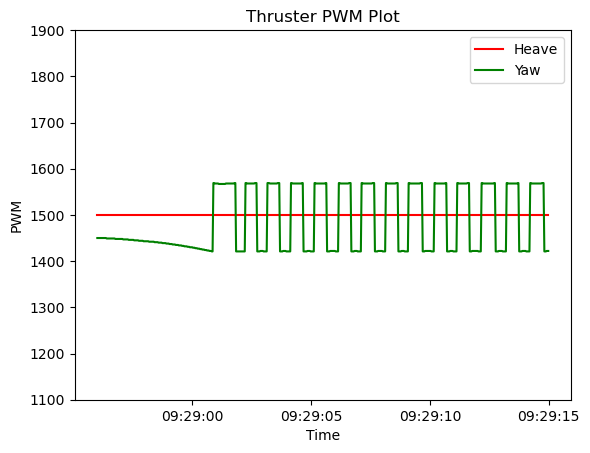

In [157]:
plt.figure()

plt.plot( thrust_extract_df["rosbagTimestamp"], thrust_extract_df["heave"], '-r', thrust_extract_df["rosbagTimestamp"], thrust_extract_df["yaw"], '-g')
plt.ylim([1100, 1900])

plt.legend(["Heave", "Yaw"])
plt.title("Thruster PWM Plot")
plt.xlabel("Time")
plt.ylabel("PWM")

plt.savefig(plot_path + "/thruster_plot.png")


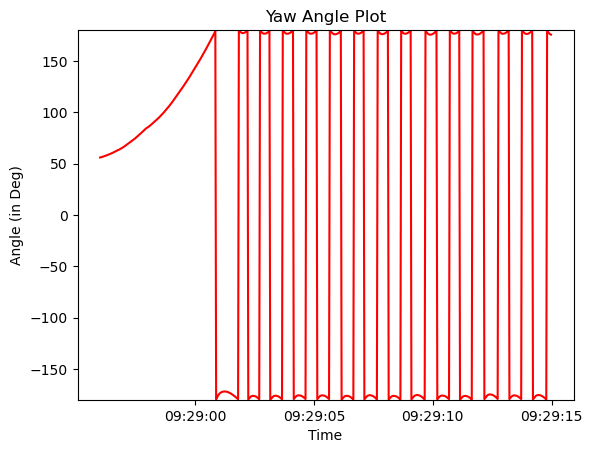

In [158]:
plt.figure()

plt.plot( ang_deg_extract_df["rosbagTimestamp"], ang_deg_extract_df["z"], '-r')
plt.ylim([-180, 180])

plt.title("Yaw Angle Plot")
plt.xlabel("Time")
plt.ylabel("Angle (in Deg)")

plt.savefig(plot_path + "/yaw_plot.png")

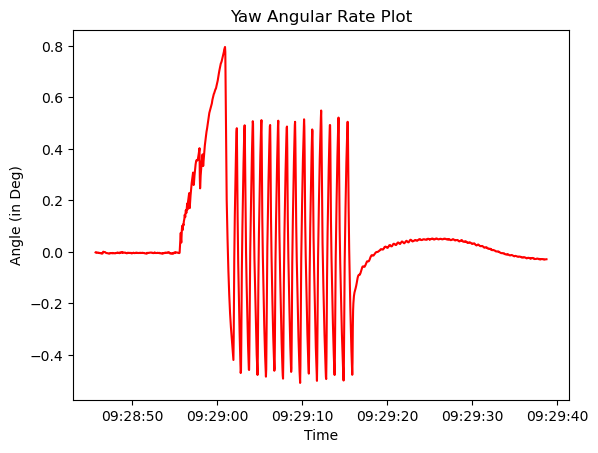

In [159]:
plt.figure()

plt.plot( ang_vel_df["rosbagTimestamp"], ang_vel_df["z"], '-r')

plt.title("Yaw Angular Rate Plot")
plt.xlabel("Time")
plt.ylabel("Angle (in Deg)")

plt.savefig(plot_path + "/yaw_rate_plot.png")

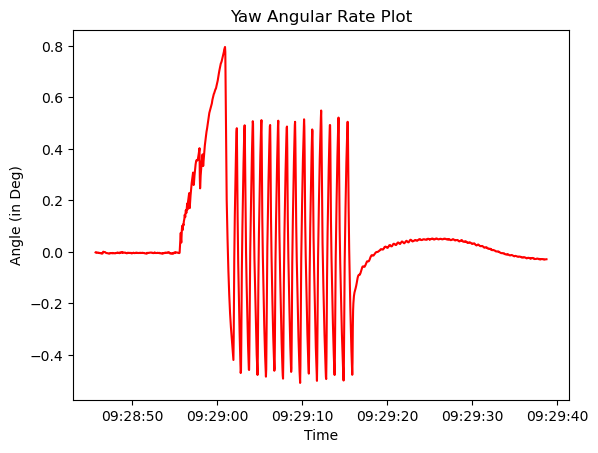

In [160]:
plt.figure()

plt.plot( ang_vel_df["rosbagTimestamp"], ang_vel_df["z"], '-r')

plt.title("Yaw Angular Rate Plot")
plt.xlabel("Time")
plt.ylabel("Angle (in Deg)")

plt.savefig(plot_path + "/yaw_rate_plot.png")

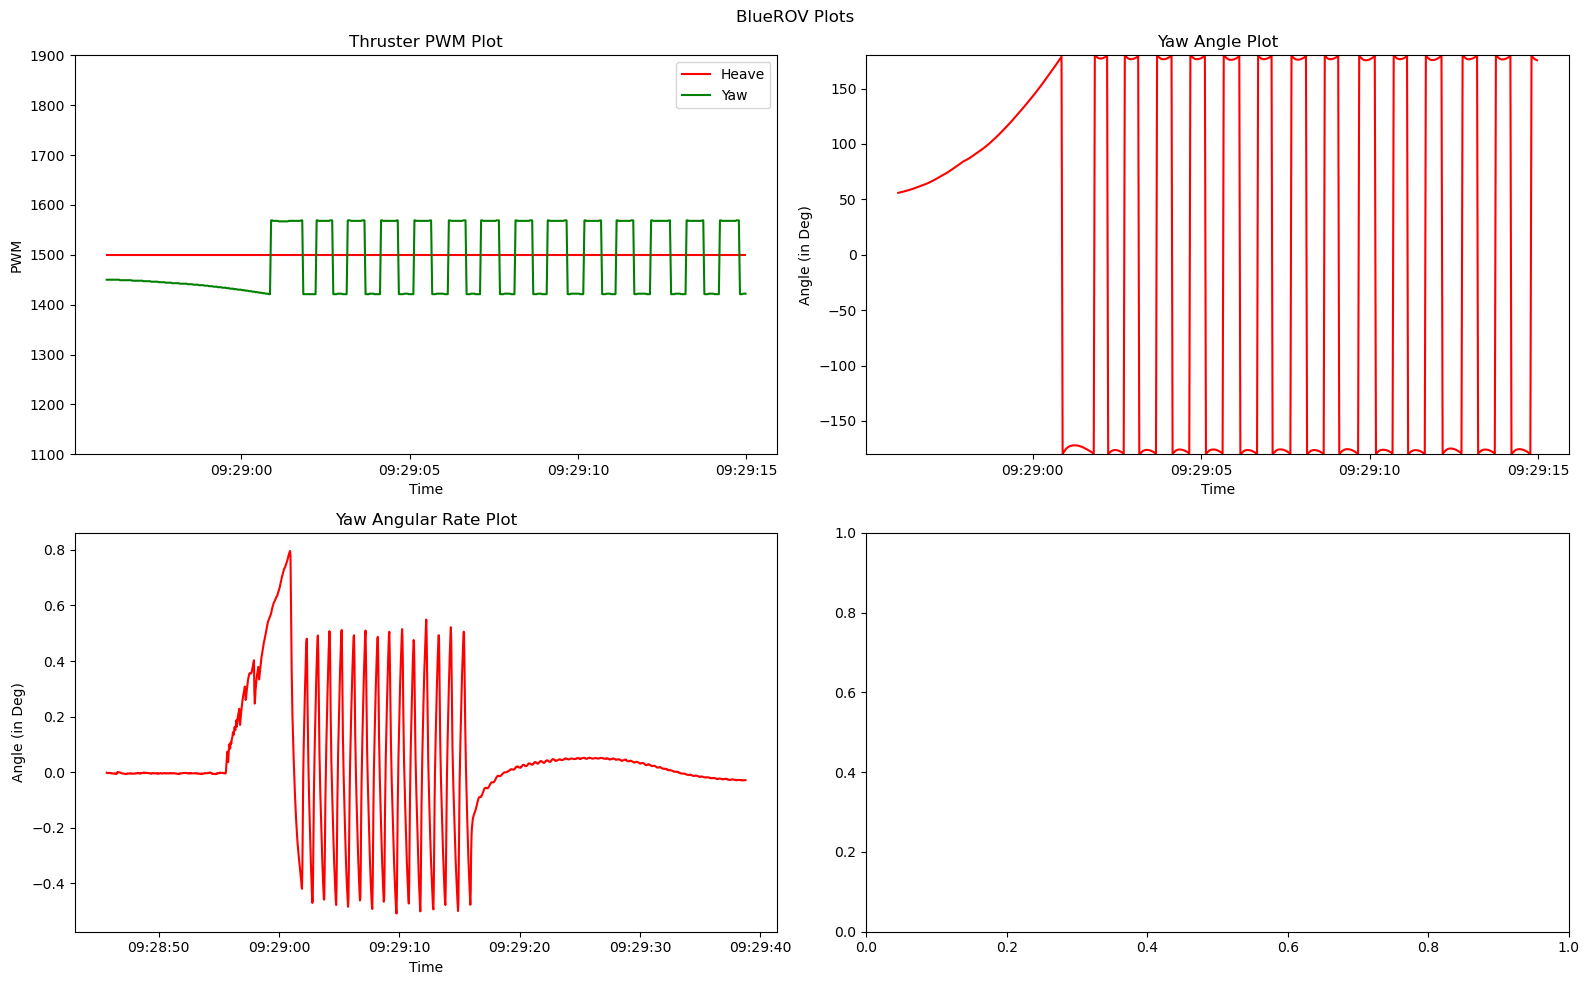

In [161]:
# create a figure with a 2x2 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# plot something in each subplot
axs[0, 0].plot( thrust_extract_df["rosbagTimestamp"], thrust_extract_df["heave"], '-r', thrust_extract_df["rosbagTimestamp"], thrust_extract_df["yaw"], '-g')
axs[0, 0].set_ylim([1100, 1900])
axs[0, 0].legend(["Heave", "Yaw"])
axs[0, 0].set_title("Thruster PWM Plot")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("PWM")

axs[0, 1].plot( ang_deg_extract_df["rosbagTimestamp"], ang_deg_extract_df["z"], '-r')
axs[0, 1].set_ylim([-180, 180])
axs[0, 1].set_title("Yaw Angle Plot")
axs[0, 1].set_xlabel("Time")
axs[0, 1].set_ylabel("Angle (in Deg)")

axs[1, 0].plot( ang_vel_df["rosbagTimestamp"], ang_vel_df["z"], '-r')
axs[1, 0].set_title("Yaw Angular Rate Plot")
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Angle (in Deg)")

# axs[1, 1].plot( ang_vel_df["rosbagTimestamp"], ang_vel_df["z"], '-r')


fig.suptitle('BlueROV Plots')
plt.tight_layout()


plt.savefig(plot_path + "/combined_plot.png")